- name - 汽车编码
- regDate - 汽车注册时间
- model - 车型编码
- brand - 品牌
- bodyType - 车身类型
- fuelType - 燃油类型
- gearbox - 变速箱
- power - 汽车功率
- kilometer - 汽车行驶公里
- notRepairedDamage - 汽车有尚未修复的损坏
- regionCode - 看车地区编码
- seller - 销售方
- offerType - 报价类型
- creatDate - 广告发布时间
- price - 汽车价格
- v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13','v_14'（根据汽车的评论、标签等大量信息得到的embedding向量）【人工构造 匿名特征】

# EDA

In [2]:
# import warnings
# warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import missingno as msno

In [6]:
train = pd.read_csv('used_car_train_20200313.csv', sep=' ')
test = pd.read_csv('used_car_testB_20200421.csv', sep=' ')

In [7]:
train.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


In [8]:
train.shape

(150000, 31)

In [9]:
test.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


In [10]:
test.shape

(50000, 30)

In [12]:
train.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,...,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,...,0.248204,0.044923,0.124692,0.058144,0.061996,-0.001000,0.009035,0.004813,0.000313,-0.000688
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,...,0.045804,0.051743,0.201410,0.029186,0.035692,3.772386,3.286071,2.517478,1.288988,1.038685
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.168192,-5.558207,-9.639552,-4.153899,-6.546556
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243615,0.000038,0.062474,0.035334,0.033930,-3.722303,-1.951543,-1.871846,-1.057789,-0.437034
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257798,0.000812,0.095866,0.057014,0.058484,1.624076,-0.358053,-0.130753,-0.036245,0.141246
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265297,0.102009,0.125243,0.079382,0.087491,2.844357,1.255022,1.776933,0.942813,0.680378
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,...,0.291838,0.151420,1.404936,0.160791,0.222787,12.357011,18.819042,13.847792,11.147669,8.658418


In [13]:
test.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SaleID             50000 non-null  int64  
 1   name               50000 non-null  int64  
 2   regDate            50000 non-null  int64  
 3   model              50000 non-null  float64
 4   brand              50000 non-null  int64  
 5   bodyType           48496 non-null  float64
 6   fuelType           47076 non-null  float64
 7   gearbox            48032 non-null  float64
 8   power              50000 non-null  int64  
 9   kilometer          50000 non-null  float64
 10  notRepairedDamage  50000 non-null  object 
 11  regionCode         50000 non-null  int64  
 12  seller             50000 non-null  int64  
 13  offerType          50000 non-null  int64  
 14  creatDate          50000 non-null  int64  
 15  v_0                50000 non-null  float64
 16  v_1                500

In [91]:
train.notRepairedDamage.replace('-',np.nan,inplace=True)
train['notRepairedDamage'] = train['notRepairedDamage'].astype('float64')

In [17]:
train.isnull().sum() / len(train) * 100

SaleID               0.000000
name                 0.000000
regDate              0.000000
model                0.000667
brand                0.000000
bodyType             3.004000
fuelType             5.786667
gearbox              3.987333
power                0.000000
kilometer            0.000000
notRepairedDamage    0.000000
regionCode           0.000000
seller               0.000000
offerType            0.000000
creatDate            0.000000
price                0.000000
v_0                  0.000000
v_1                  0.000000
v_2                  0.000000
v_3                  0.000000
v_4                  0.000000
v_5                  0.000000
v_6                  0.000000
v_7                  0.000000
v_8                  0.000000
v_9                  0.000000
v_10                 0.000000
v_11                 0.000000
v_12                 0.000000
v_13                 0.000000
v_14                 0.000000
dtype: float64

In [18]:
test.isnull().sum() / len(test) * 100

SaleID               0.000
name                 0.000
regDate              0.000
model                0.000
brand                0.000
bodyType             3.008
fuelType             5.848
gearbox              3.936
power                0.000
kilometer            0.000
notRepairedDamage    0.000
regionCode           0.000
seller               0.000
offerType            0.000
creatDate            0.000
v_0                  0.000
v_1                  0.000
v_2                  0.000
v_3                  0.000
v_4                  0.000
v_5                  0.000
v_6                  0.000
v_7                  0.000
v_8                  0.000
v_9                  0.000
v_10                 0.000
v_11                 0.000
v_12                 0.000
v_13                 0.000
v_14                 0.000
dtype: float64

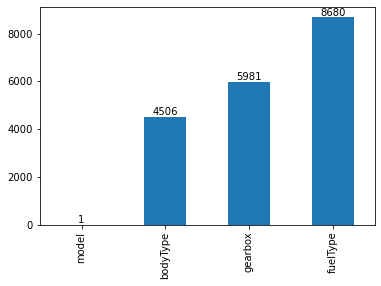

In [34]:
missing = train.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()
for i in range(len(missing)):
    plt.text(i,missing[i],missing[i],ha='center',va='bottom')
plt.show()

In [35]:
train.sample(250)

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
91334,91334,93364,19950408,19.0,6,0.0,0.0,0.0,115,12.5,...,0.263388,0.000000,0.099787,0.031069,0.045099,3.276925,-1.205884,-2.398174,-1.369000,-0.391997
28394,28394,88101,19981101,10.0,9,1.0,0.0,0.0,59,15.0,...,0.232525,0.000000,0.093913,0.034091,0.114076,3.958917,0.079037,-3.176908,1.330703,0.541083
60702,60702,26162,20110909,31.0,10,0.0,1.0,1.0,265,9.0,...,0.263699,0.000892,0.115662,0.118071,0.031640,1.287074,-3.409643,4.535318,-0.082717,0.862321
91693,91693,96412,19950005,13.0,4,NaN,0.0,NaN,192,15.0,...,0.000000,0.000000,1.290892,0.071434,0.000000,9.920666,14.419814,6.068574,-2.278779,-0.711873
87452,87452,16833,19990607,0.0,0,2.0,0.0,0.0,75,15.0,...,0.265673,0.102226,0.070727,0.027507,0.018360,-3.397304,1.861202,-2.072654,-1.172798,0.095775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20399,20399,17091,20060010,91.0,0,1.0,0.0,0.0,55,15.0,...,0.235472,0.095118,0.103120,0.049562,0.094293,-2.864823,2.082633,-0.811762,1.475894,0.935646
29317,29317,4266,19920211,54.0,1,0.0,NaN,0.0,116,15.0,...,0.255966,0.094916,0.045385,0.014034,0.077589,-2.608145,1.936885,-3.612100,0.221774,0.346031
44950,44950,88754,20021110,21.0,16,4.0,0.0,1.0,54,3.0,...,0.271301,0.000008,0.038130,0.061123,0.056753,2.332290,-2.585981,-0.506699,-0.311535,0.272875
54687,54687,3035,19990301,26.0,14,2.0,0.0,0.0,75,15.0,...,0.255304,0.107588,0.059380,0.027090,0.064057,-3.673950,2.094650,-2.341614,0.093769,0.219575


In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 31 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   SaleID             150000 non-null  int64  
 1   name               150000 non-null  int64  
 2   regDate            150000 non-null  int64  
 3   model              149999 non-null  float64
 4   brand              150000 non-null  int64  
 5   bodyType           145494 non-null  float64
 6   fuelType           141320 non-null  float64
 7   gearbox            144019 non-null  float64
 8   power              150000 non-null  int64  
 9   kilometer          150000 non-null  float64
 10  notRepairedDamage  150000 non-null  object 
 11  regionCode         150000 non-null  int64  
 12  seller             150000 non-null  int64  
 13  offerType          150000 non-null  int64  
 14  creatDate          150000 non-null  int64  
 15  price              150000 non-null  int64  
 16  v_

In [37]:
train.notRepairedDamage.value_counts()

0.0    111361
-       24324
1.0     14315
Name: notRepairedDamage, dtype: int64

In [92]:
train.notRepairedDamage.value_counts()

0.0    111361
1.0     14315
Name: notRepairedDamage, dtype: int64

In [40]:
train.isnull().sum()

SaleID                   0
name                     0
regDate                  0
model                    1
brand                    0
bodyType              4506
fuelType              8680
gearbox               5981
power                    0
kilometer                0
notRepairedDamage    24324
regionCode               0
seller                   0
offerType                0
creatDate                0
price                    0
v_0                      0
v_1                      0
v_2                      0
v_3                      0
v_4                      0
v_5                      0
v_6                      0
v_7                      0
v_8                      0
v_9                      0
v_10                     0
v_11                     0
v_12                     0
v_13                     0
v_14                     0
dtype: int64

In [42]:
train["seller"].value_counts()

0    149999
1         1
Name: seller, dtype: int64

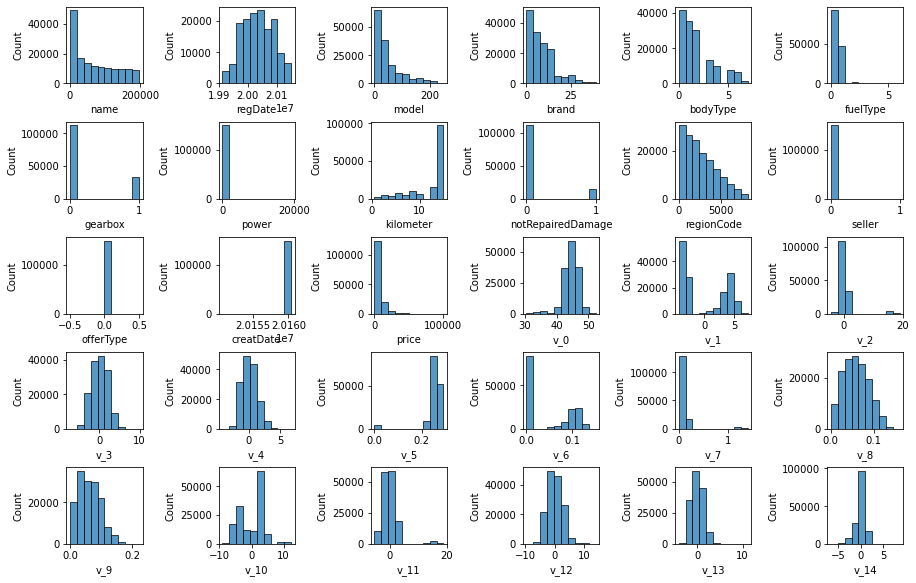

In [94]:
fig = plt.figure(figsize=(15,12))
n = 0
for i in range(1, len(train.columns)):
    n+=1
    plt.subplot(6, 6, i)
    plt.subplots_adjust(hspace=0.5,wspace=1)
    sns.histplot(train[train.columns[i]],bins=10)
    
plt.show()

In [106]:
cols = ['power','seller','offerType','creatDate']
for col in cols:
    print(col,train[col].value_counts())

power 0       12829
75       9593
150      6495
60       6374
140      5963
        ...  
1993        1
202         1
587         1
332         1
3454        1
Name: power, Length: 566, dtype: int64
seller 0    149999
1         1
Name: seller, dtype: int64
offerType 0    150000
Name: offerType, dtype: int64
creatDate 20160403    5848
20160404    5606
20160320    5485
20160312    5383
20160402    5382
            ... 
20160126       1
20160120       1
20160123       1
20160118       1
20150807       1
Name: creatDate, Length: 96, dtype: int64


In [110]:
del train["seller"]
del train["offerType"]
del test["seller"]
del test["offerType"]

In [108]:
train.price

0         1850
1         3600
2         6222
3         2400
4         5200
          ... 
149995    5900
149996    9500
149997    7500
149998    4999
149999    4700
Name: price, Length: 150000, dtype: int64

<AxesSubplot:xlabel='price', ylabel='Count'>

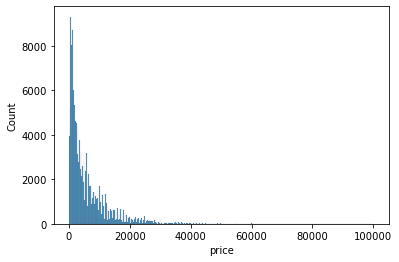

In [109]:
sns.histplot(train.price)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:title={'center':'Log Normal'}, xlabel='price'>

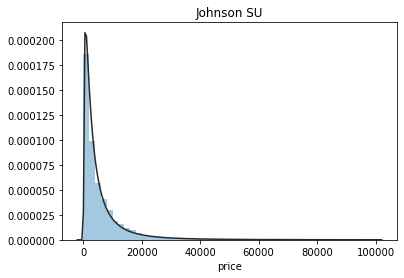

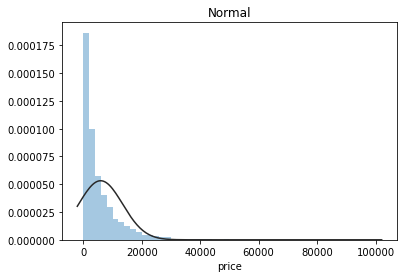

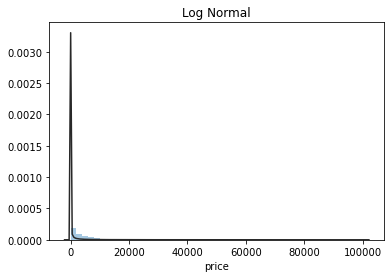

In [117]:
import scipy.stats as st
y = train['price']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

In [120]:
#偏度与峰度
print("偏度: %f" % train['price'].skew())
print("峰度: %f" % train['price'].kurt())

偏度: 3.346487
峰度: 18.995183


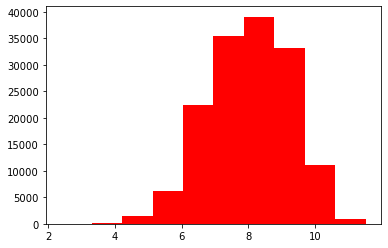

In [121]:
plt.hist(np.log(train['price']), orientation = 'vertical',histtype = 'bar', color ='red') 
plt.show()


In [122]:
ytrain = train['price']

In [123]:
train.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6',
       'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14'],
      dtype='object')

In [124]:
numeric_features = ['power', 'kilometer', 
                    'v_0', 'v_1', 'v_2', 'v_3', 'v_4', 'v_5', 'v_6', 'v_7',
                    'v_8', 'v_9', 'v_10', 'v_11', 'v_12', 'v_13', 'v_14']
categorical_features = ['name','model', 'brand', 'bodyType', 'fuelType', 
                        'gearbox','notRepairedDamage', 'regionCode']

In [125]:
numeric_features.append('price')

In [126]:
price_numeric = train[numeric_features]
correlation = price_numeric.corr()
print(correlation['price'].sort_values(ascending = False),'\n')

price        1.000000
v_12         0.692823
v_8          0.685798
v_0          0.628397
power        0.219834
v_5          0.164317
v_2          0.085322
v_6          0.068970
v_1          0.060914
v_14         0.035911
v_13        -0.013993
v_7         -0.053024
v_4         -0.147085
v_9         -0.206205
v_10        -0.246175
v_11        -0.275320
kilometer   -0.440519
v_3         -0.730946
Name: price, dtype: float64 



<AxesSubplot:>

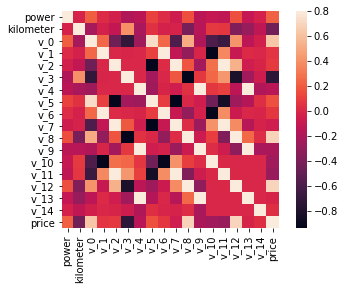

In [128]:
sns.heatmap(correlation,square = True, vmax=0.8)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


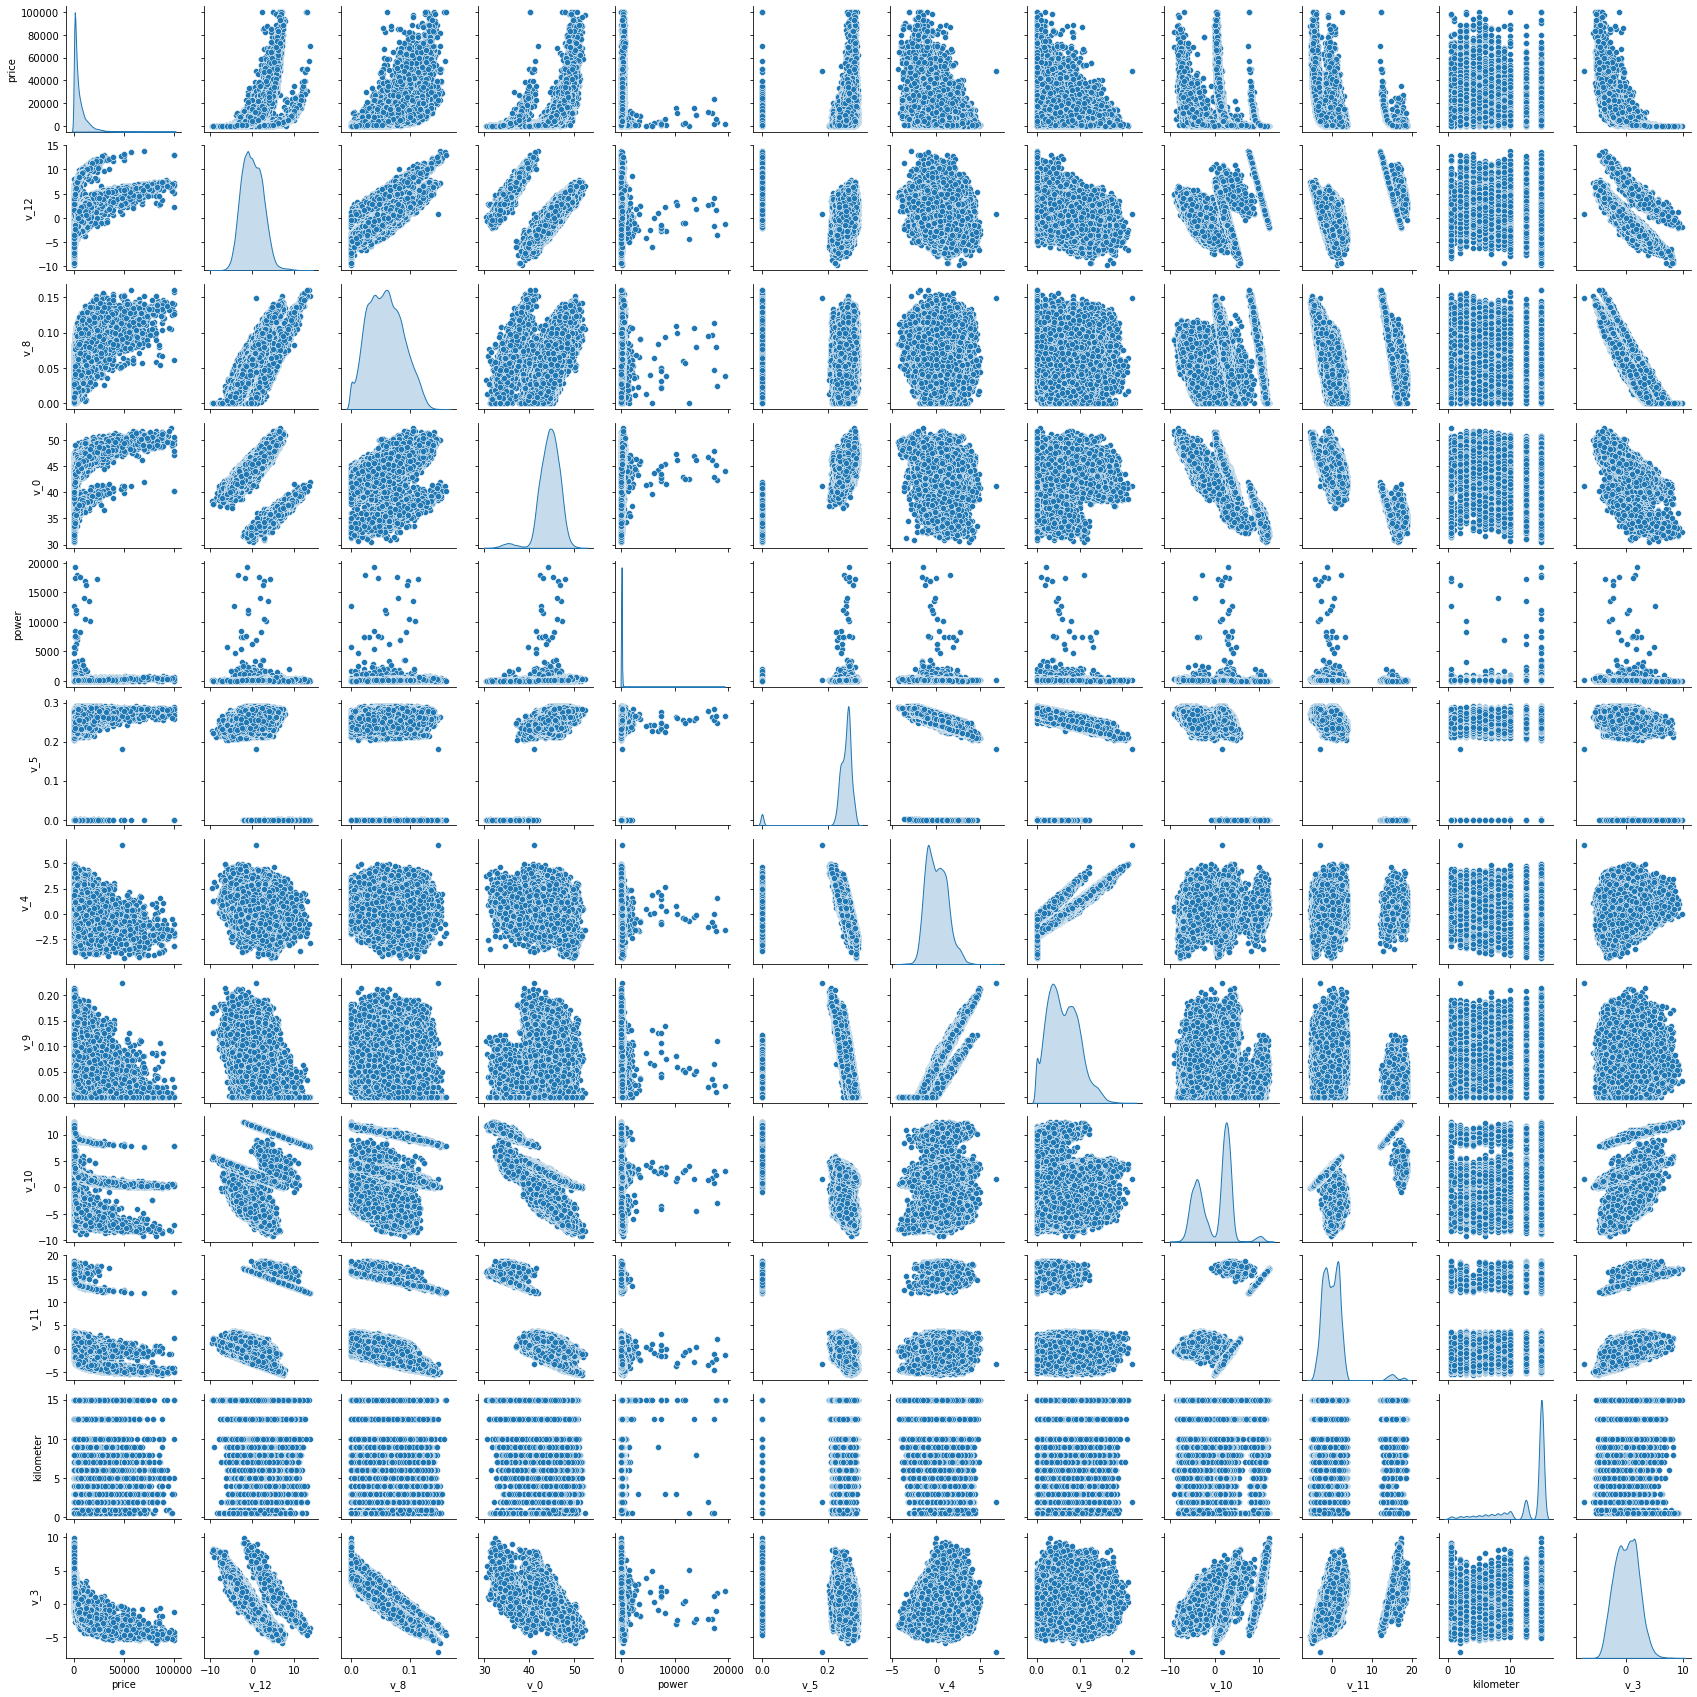

In [136]:
columns = ['price', 'v_12', 'v_8' , 'v_0','power','v_5','v_4','v_9',
           'v_10', 'v_11','kilometer','v_3']
sns.pairplot(train[columns],size = 2 ,kind ='scatter',diag_kind='kde')
plt.show()

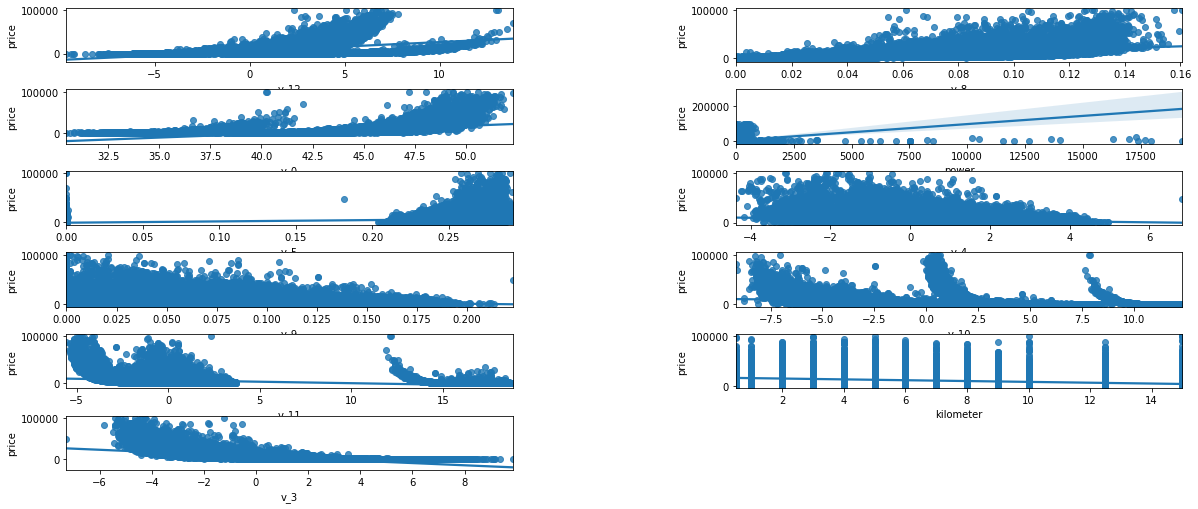

In [140]:
fig = plt.figure(figsize=(20,10))
n = 0
for i in range(1, len(columns)):
    n+=1
    plt.subplot(7,2,i)
    plt.subplots_adjust(wspace=0.5,hspace=0.5)
    sns.regplot(x=train[columns[i]],y=train['price'],scatter=True,fit_reg=True)
    
plt.show()

In [142]:
f = pd.melt(train, id_vars=['price'], value_vars=categorical_features)
g = sns.FacetGrid(f, col="variable", col_wrap=2, sharex=False, sharey=False, size=5)
g = g.map(sns.barplot, "value", "price")
plt.xticks(rotation=90)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


Error in callback <function flush_figures at 0x00000248FB6BBCA0> (for post_execute):


KeyboardInterrupt: 

In [144]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/43 [00:00<?, ?it/s]

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:4594: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]